In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


#Outlier Detection Using Viz


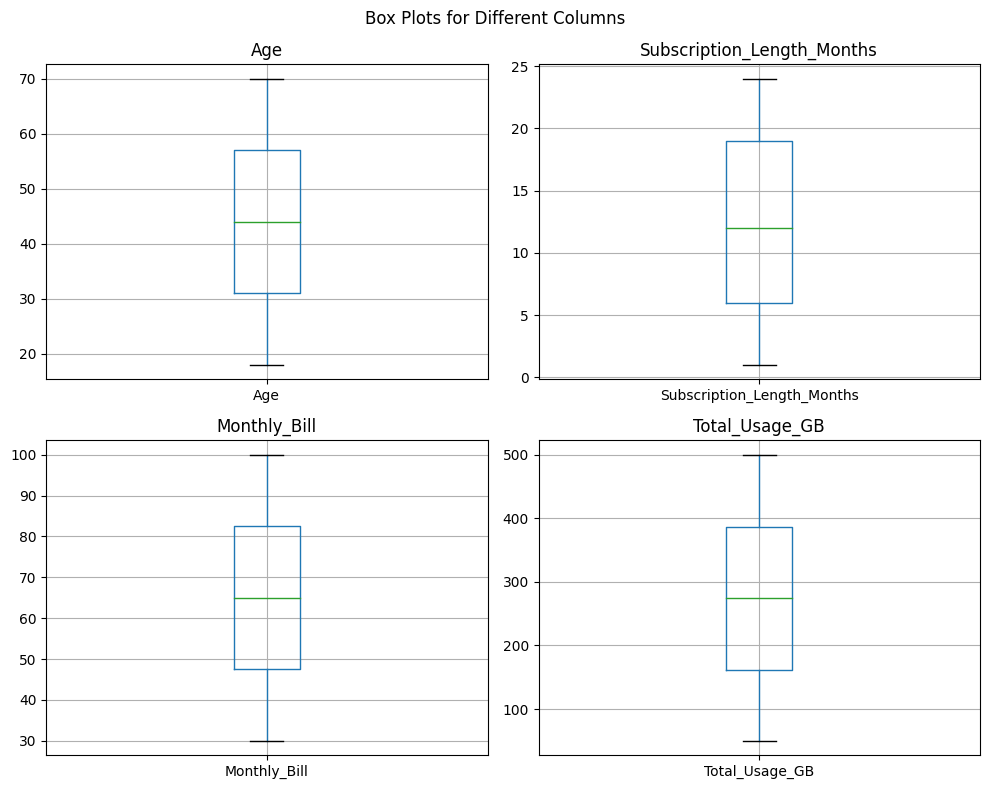

In [ ]:
import matplotlib.pyplot as plt
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Box Plots for Different Columns')

# Plotting box plots
df.boxplot(column='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age')

df.boxplot(column='Subscription_Length_Months', ax=axes[0, 1])
axes[0, 1].set_title('Subscription_Length_Months')

df.boxplot(column='Monthly_Bill', ax=axes[1, 0])
axes[1, 0].set_title('Monthly_Bill')

df.boxplot(column='Total_Usage_GB', ax=axes[1, 1])
axes[1, 1].set_title('Total_Usage_GB')

plt.tight_layout()
plt.show()

In [ ]:
df.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [ ]:
df.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

Remove unnecessary columns

In [4]:
df = df.drop(columns = ['CustomerID', 'Name'])

Dummy encode for nominal categorical data

drop_first = True to avoid multicolinearity

In [5]:

# Specify the columns to dummy encode
columns_to_encode = ['Gender', 'Location']

# Perform dummy encoding using pandas get_dummies function
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first= True)
df = df_encoded

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Splitting the data into features (X) and target (y)
X = df.drop('Churn', axis=1)  # Remove the target column from features
y = df['Churn']  # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




Sperate scaler objects to avoid Data Leakage

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Columns you want to scale (e.g., 'Feature1' and 'Feature3')
columns_to_scale = ['Subscription_Length_Months',	'Monthly_Bill',	'Total_Usage_GB']

# Initialize the StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()

# Select the columns to scale
data_to_scale_train = X_train[columns_to_scale]
data_to_scale_test = X_test[columns_to_scale]

# Fit the scaler to the selected columns and transform the data
X_train_scale = scaler_train.fit_transform(data_to_scale_train)
X_test_scale = scaler_train.fit_transform(data_to_scale_test)

# Replace the scaled data in the original DataFrame
X_train[columns_to_scale] = X_train_scale
X_test[columns_to_scale] = X_test_scale


#Plot Feature Importance



use sample of entire data(can use entire dataset at the end)

In [8]:
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]

X_test_sample = X_test[:10000]
y_test_sample = y_test[:10000]

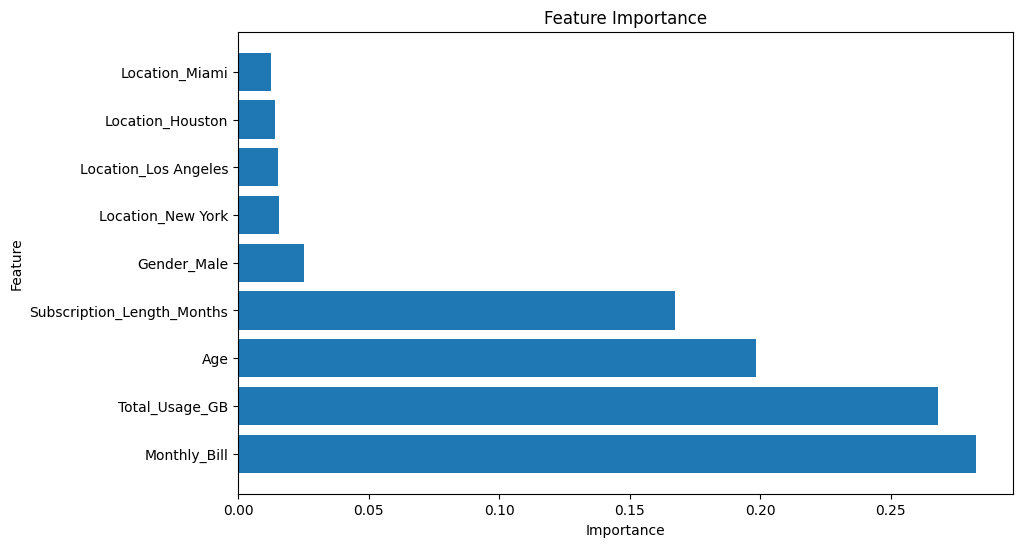

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train_sample, y_train_sample)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train_sample.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#Model Selection

In [ ]:
!pip install lazypredict

In [9]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier
clf = LazyClassifier(verbose=3, ignore_warnings=True, custom_metric=None)

# Fit and predict using LazyClassifier
models,_ = clf.fit(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

# Display the results
models


  3%|▎         | 1/29 [00:00<00:14,  1.95it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.5066, 'Balanced Accuracy': 0.5059562226391495, 'ROC AUC': 0.5059562226391495, 'F1 Score': 0.5063457411761086, 'Time taken': 0.5111024379730225}


  7%|▋         | 2/29 [00:01<00:15,  1.77it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.5023, 'Balanced Accuracy': 0.49971482176360227, 'ROC AUC': 0.4997148217636022, 'F1 Score': 0.49698518328994906, 'Time taken': 0.6009290218353271}
{'Model': 'BernoulliNB', 'Accuracy': 0.5019, 'Balanced Accuracy': 0.500375234521576, 'ROC AUC': 0.500375234521576, 'F1 Score': 0.5001147536780574, 'Time taken': 0.05177927017211914}


 21%|██        | 6/29 [00:02<00:08,  2.68it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.5055, 'Balanced Accuracy': 0.5014959349593496, 'ROC AUC': 0.5014959349593495, 'F1 Score': 0.492498628159458, 'Time taken': 1.2721643447875977}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5076, 'Balanced Accuracy': 0.5077273295809881, 'ROC AUC': 0.5077273295809881, 'F1 Score': 0.5076651187372583, 'Time taken': 0.15557122230529785}
{'Model': 'DummyClassifier', 'Accuracy': 0.5125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.34731404958677686, 'Time taken': 0.03532695770263672}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.4947, 'Balanced Accuracy': 0.4948717948717949, 'ROC AUC': 0.4948717948717949, 'F1 Score': 0.49475419506440066, 'Time taken': 0.04542088508605957}


 31%|███       | 9/29 [00:04<00:09,  2.16it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5073, 'Balanced Accuracy': 0.5070444027517198, 'ROC AUC': 0.5070444027517198, 'F1 Score': 0.50732370637486, 'Time taken': 1.56972336769104}
{'Model': 'GaussianNB', 'Accuracy': 0.5004, 'Balanced Accuracy': 0.49999249530956846, 'ROC AUC': 0.49999249530956846, 'F1 Score': 0.5003452783877059, 'Time taken': 0.04199337959289551}


 38%|███▊      | 11/29 [00:04<00:07,  2.34it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5036, 'Balanced Accuracy': 0.5035297060662914, 'ROC AUC': 0.5035297060662914, 'F1 Score': 0.5036734051847735, 'Time taken': 0.6554336547851562}


 41%|████▏     | 12/29 [00:11<00:27,  1.63s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.507, 'Balanced Accuracy': 0.5070519074421513, 'ROC AUC': 0.5070519074421513, 'F1 Score': 0.5070752599762108, 'Time taken': 6.802702903747559}


 48%|████▊     | 14/29 [00:23<00:42,  2.83s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.5061, 'Balanced Accuracy': 0.5061138211382115, 'ROC AUC': 0.5061138211382115, 'F1 Score': 0.5061771041398171, 'Time taken': 11.161430835723877}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.5032, 'Balanced Accuracy': 0.502063789868668, 'ROC AUC': 0.502063789868668, 'F1 Score': 0.502245915258931, 'Time taken': 0.1138763427734375}


 59%|█████▊    | 17/29 [00:23<00:15,  1.32s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.5032, 'Balanced Accuracy': 0.502063789868668, 'ROC AUC': 0.502063789868668, 'F1 Score': 0.502245915258931, 'Time taken': 0.3735692501068115}
{'Model': 'LogisticRegression', 'Accuracy': 0.5031, 'Balanced Accuracy': 0.5019612257661038, 'ROC AUC': 0.5019612257661038, 'F1 Score': 0.5021411700048802, 'Time taken': 0.07534337043762207}
{'Model': 'NearestCentroid', 'Accuracy': 0.501, 'Balanced Accuracy': 0.5009981238273922, 'ROC AUC': 0.5009981238273922, 'F1 Score': 0.5010779761394919, 'Time taken': 0.053540945053100586}


 69%|██████▉   | 20/29 [00:44<00:31,  3.54s/it]

{'Model': 'NuSVC', 'Accuracy': 0.5011, 'Balanced Accuracy': 0.5015409631019387, 'ROC AUC': 0.5015409631019387, 'F1 Score': 0.5010234118689427, 'Time taken': 20.916666746139526}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5023, 'Balanced Accuracy': 0.5014659161976236, 'ROC AUC': 0.5014659161976236, 'F1 Score': 0.5018215433958418, 'Time taken': 0.04698443412780762}
{'Model': 'Perceptron', 'Accuracy': 0.5069, 'Balanced Accuracy': 0.5076547842401501, 'ROC AUC': 0.5076547842401501, 'F1 Score': 0.5065331445255109, 'Time taken': 0.06352353096008301}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.4955, 'Balanced Accuracy': 0.4948167604752971, 'ROC AUC': 0.49481676047529705, 'F1 Score': 0.49520511407824763, 'Time taken': 0.0772857666015625}


 76%|███████▌  | 22/29 [00:47<00:19,  2.77s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.507, 'Balanced Accuracy': 0.5064815509693559, 'ROC AUC': 0.5064815509693559, 'F1 Score': 0.5068615294477907, 'Time taken': 2.7655646800994873}
{'Model': 'RidgeClassifier', 'Accuracy': 0.5032, 'Balanced Accuracy': 0.502063789868668, 'ROC AUC': 0.502063789868668, 'F1 Score': 0.502245915258931, 'Time taken': 0.09152984619140625}


 86%|████████▌ | 25/29 [00:47<00:06,  1.54s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.5032, 'Balanced Accuracy': 0.5020537836147593, 'ROC AUC': 0.5020537836147593, 'F1 Score': 0.5022276455187002, 'Time taken': 0.18208718299865723}
{'Model': 'SGDClassifier', 'Accuracy': 0.4968, 'Balanced Accuracy': 0.4959549718574109, 'ROC AUC': 0.4959549718574109, 'F1 Score': 0.49630609157409944, 'Time taken': 0.12703371047973633}


 90%|████████▉ | 26/29 [00:59<00:11,  3.70s/it]

{'Model': 'SVC', 'Accuracy': 0.5054, 'Balanced Accuracy': 0.5038348968105065, 'ROC AUC': 0.5038348968105066, 'F1 Score': 0.5035222464445336, 'Time taken': 11.416577100753784}


 97%|█████████▋| 28/29 [01:01<00:02,  2.73s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.504, 'Balanced Accuracy': 0.5039249530956849, 'ROC AUC': 0.5039249530956849, 'F1 Score': 0.5040727511447186, 'Time taken': 2.334339141845703}
[LightGBM] [Info] Number of positive: 4976, number of negative: 5024
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497600 -> initscore=-0.009600
[LightGBM] [Info] Start training from score -0.009600


100%|██████████| 29/29 [01:01<00:00,  2.14s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.4981, 'Balanced Accuracy': 0.4976485303314572, 'ROC AUC': 0.4976485303314572, 'F1 Score': 0.4980157278808611, 'Time taken': 0.28218960762023926}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.51,0.51,0.51,0.51,0.16
Perceptron,0.51,0.51,0.51,0.51,0.06
LabelPropagation,0.51,0.51,0.51,0.51,6.80
ExtraTreesClassifier,0.51,0.51,0.51,0.51,1.57
RandomForestClassifier,0.51,0.51,0.51,0.51,2.77
LabelSpreading,0.51,0.51,0.51,0.51,11.16
AdaBoostClassifier,0.51,0.51,0.51,0.51,0.51
XGBClassifier,0.50,0.50,0.50,0.50,2.33
SVC,0.51,0.50,0.50,0.50,11.42


Conclusion: Data is randomly distributed no inference can be drawn to determine churn predicition.

Lets go With RandomForest and train on entire dataset

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Train (fit) the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49725


Cross Validation Score

In [13]:
import numpy as np
from sklearn.model_selection import cross_val_score


model = clf

# Perform 5-fold cross-validation
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds)

# Print the scores for each fold and the mean score
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: Score = {score:.4f}")

mean_score = np.mean(scores)
print(f"Mean Score = {mean_score:.4f}")


Fold 1: Score = 0.4986
Fold 2: Score = 0.5054
Fold 3: Score = 0.4958
Fold 4: Score = 0.5019
Fold 5: Score = 0.4983
Mean Score = 0.5000


Fine Tune Random Forest

In [11]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(10, 200),  # Number of trees
    'max_depth': [None] + list(np.arange(3, 20, 1)),  # Maximum depth of each tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'bootstrap': [True, False],  # Whether to use bootstrapping or not
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)  # Minimum number of samples required to be at a leaf node
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Perform the search
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the testing data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 17, 'min_samples_split': 9, 'n_estimators': 77}
Best Score: 0.50484996515733
Test Accuracy: 0.5054


In [15]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_train, best_model.predict(X_train))

print("Classification Report for training data:\n", report)

Classification Report for training data:
               precision    recall  f1-score   support

           0       0.54      0.62      0.58     40057
           1       0.55      0.47      0.51     39943

    accuracy                           0.54     80000
   macro avg       0.55      0.54      0.54     80000
weighted avg       0.55      0.54      0.54     80000



In [16]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, best_model.predict(X_test))

print("Classification Report for training data:\n", report)

Classification Report for training data:
               precision    recall  f1-score   support

           0       0.51      0.58      0.54     10164
           1       0.50      0.43      0.46      9836

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.51      0.50     20000



Save best model

In [12]:
import joblib
#Save the trained model using joblib
model_filename = 'Best_random_forest_model.joblib'
joblib.dump(best_model, model_filename)

print("Model saved as", model_filename)






Model saved as Best_random_forest_model.joblib


In [17]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
19627,49,1.66,-0.24,0.44,0,0,0,1,0
30326,54,0.65,0.95,-1.68,0,0,0,0,0
63365,53,0.65,-1.14,-0.43,0,0,0,0,1
53665,56,-0.36,1.11,-1.22,1,0,0,0,0
10417,69,-0.21,-0.50,0.82,0,1,0,0,0


In [ ]:
!pip install -q streamlit

In [61]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = joblib.load("Best_random_forest_model.joblib")

def main():
    st.title("Customer Churn Prediction")

    # Input fields
    Age = st.number_input("Age", min_value=1, max_value=120, step=1)
    gender = st.selectbox("Gender", ["Male", "Female"])
    location = st.selectbox("Location", ["Houston", "Los Angeles", "Miami", "Chicago", "New York"])
    Subscription_Length_Months = st.number_input("Subscription Length (Months)", min_value=1, step=1)
    Monthly_Bill = st.number_input("Monthly Bill", min_value=0.0, step=10.0)
    Total_Usage_GB = st.number_input("Total Usage (GB)", min_value=0.0, step=1.0)

    # Convert categorical features to numerical using encoding
    Gender_Male = 1 if gender == "Male" else 0
    Location_Houston = Location_Los_Angeles	= Location_Miami	= Location_New_York = 0

    if location == "Houston":
      Location_Houston = 1
    elif location == "Los Angeles":
      Location_Los_Angeles = 1
    elif location == "Miami":
      Location_Miami = 1
    elif location == "New York":
      Location_New_York = 1

    # Predict button
    if st.button("Predict"):
        scaler = StandardScaler()
        input_data = np.array([[Age, Subscription_Length_Months,	Monthly_Bill,	Total_Usage_GB,	Gender_Male,	Location_Houston,	Location_Los_Angeles,	Location_Miami,	Location_New_York]])
        scaled_data = scaler.fit_transform([input_data[0][1:4]])
        input_data[0][1:4] = scaled_data[0]
        print(input_data)
        prediction = model.predict(input_data)
        if prediction[0] == 0:
            st.write("Prediction: Customer will not churn")
        else:
            st.write("Prediction: Customer will churn")

if __name__ == "__main__":
    main()


Overwriting app.py


In [62]:
!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501

34.150.214.44
[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.214.44:8501

npx: installed 22 in 2.57s
your url is: https://weak-regions-hear.loca.lt
[[1. 0. 0. 0. 1. 1. 0. 0. 0.]]
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
  Stopping...
^C
